### **Spaceship Titanic**<br>
**Predict which passengers are transported to an alternate dimension**

`Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.`

`The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.`

`While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!`

<img src="joel-filipe-QwoNAhbmLLo-unsplash.jpg" alt="Alt Text" width="400" height="300">


**`To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.`**

In [1118]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer


In [1119]:
# Load the train data

train_data = pd.read_csv('train.csv')
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**This dataset contains 8693 rows and 14 columns.<br> This dataset also contains quite a number of categorical columns (norminal)**

In [1120]:
# Print out all the columns in the dataset
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [1121]:
# Check the datatypes of the dataset's columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1122]:
def print_missing_values(dataset):
    # Create a Pandas DataFrame from the dataset
    df = pd.DataFrame(dataset)

    # Check for missing values in each column and calculate the count and percentage
    missing_values_count = df.isnull().sum()
    missing_values_percentage = (missing_values_count / len(df)) * 100

    # Create a new DataFrame to store the results
    missing_values_table = pd.DataFrame({
        'Count': missing_values_count,
        'Percentage': missing_values_percentage
    })

    # Filter the DataFrame to show only columns with missing values
    missing_values_table = missing_values_table[missing_values_table['Count'] > 0]

    # Print the table of missing values
    print("Columns with missing values:")
    print()
    print(missing_values_table)

# Test the function with a sample dataset
print_missing_values(train_data)


Columns with missing values:

              Count  Percentage
HomePlanet      201    2.312205
CryoSleep       217    2.496261
Cabin           199    2.289198
Destination     182    2.093639
Age             179    2.059128
VIP             203    2.335212
RoomService     181    2.082135
FoodCourt       183    2.105142
ShoppingMall    208    2.392730
Spa             183    2.105142
VRDeck          188    2.162660
Name            200    2.300702


**Quite a number of columns contain missing values.**

In [1123]:
# Examine the homeplanet column
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

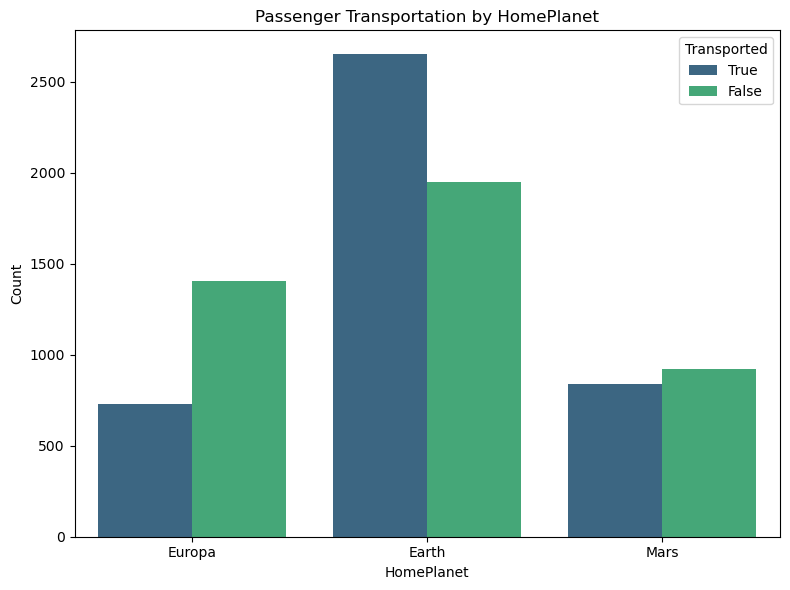

In [1124]:
# Bar plot (HomePlanet)
plt.figure(figsize=(8, 6))
sns.countplot(data= train_data, x='HomePlanet', hue='Transported', palette='viridis')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Passenger Transportation by HomePlanet')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**From the bar plot, most passengers who were trasported were from planet earth.**

In [1125]:
# Examining how many passengers were in planet europa
planet_europa = train_data[train_data['HomePlanet']=='Europa']
planet_europa

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**There are 0ver 2000 entries of passenges who were from planet europa**

In [1126]:
# Examining how many passengers were in planet earth
planet_earth = train_data[train_data['HomePlanet']=='Earth']
planet_earth

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


In [1127]:
# Examining how many passengers were in planet earth
planet_mars = train_data[train_data['HomePlanet']=='Mars']
planet_mars

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
31,0028_01,Mars,False,F/8/P,TRAPPIST-1e,43.0,False,1125.0,0.0,136.0,48.0,0.0,Ceros Mare,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False
8660,9239_01,Mars,False,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,Per Minen,False
8661,9241_01,Mars,False,E/595/P,TRAPPIST-1e,30.0,False,699.0,0.0,600.0,0.0,0.0,Ants Fone,False


In [1128]:
train_data['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

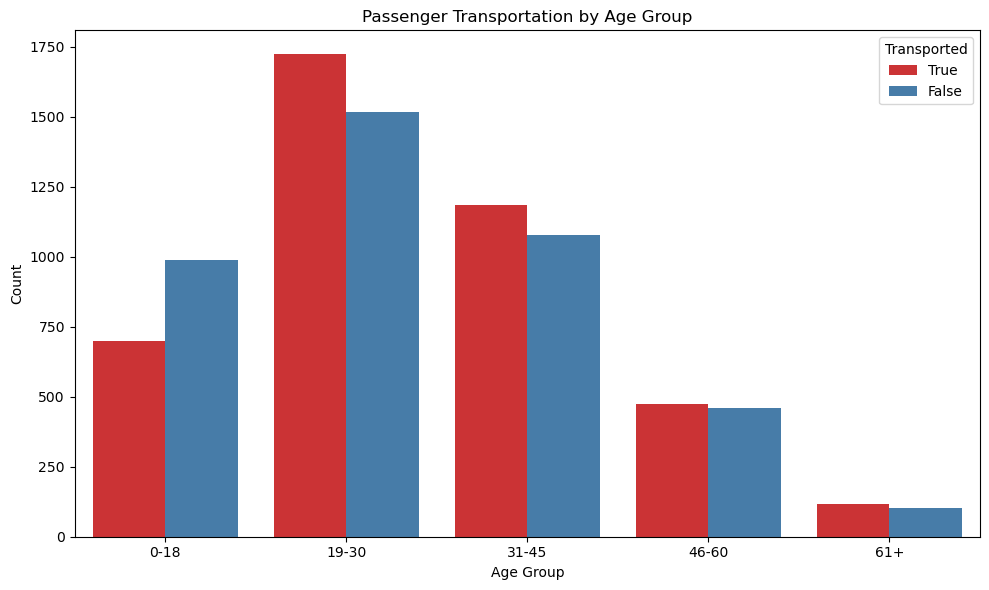

In [1129]:
# (Age)
age_bins = [0, 18, 30, 45, 60, 80]  
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Categorize ages into bins
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)

# Create a countplot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='AgeGroup', hue='Transported', palette='Set1', order=age_labels)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Passenger Transportation by Age Group')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

I create a new column called 'AgeGroup' in the DataFrame. I then use pd.cut(train_data['Age'], bins=age_bins, labels=age_labels) which is a Pandas function called cut, which is used for binning values into discrete intervals or categories.<br><br>
**The graph shows that the largest number of passengers transported are in the 19-30 age group, followed by the 31-45 age group. The number of passengers transported decreases with age, with the smallest number of passengers transported in the 61+ age group.**

In [1130]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,31-45
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,19-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,46-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,31-45
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,31-45
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0-18
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,19-30
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,31-45


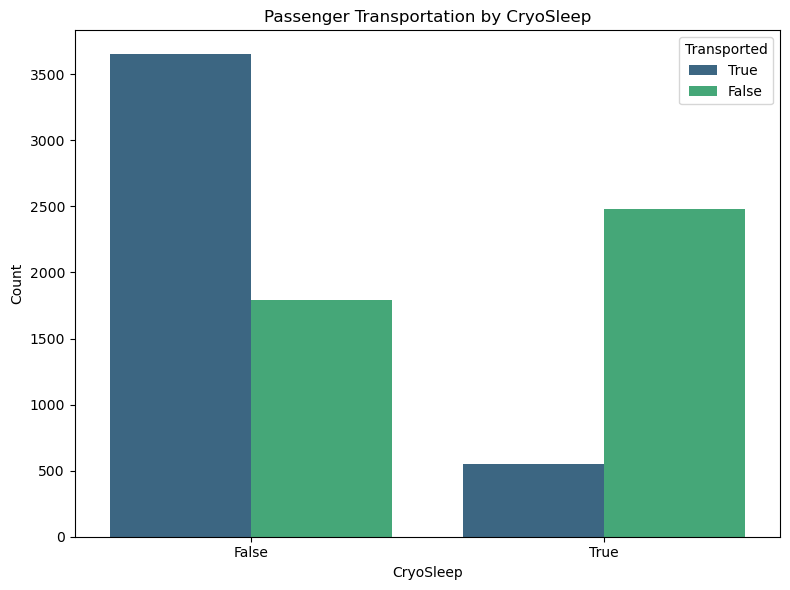

In [1131]:
# Bar plot (CryoSleep)
plt.figure(figsize=(8, 6))
sns.countplot(data= train_data, x='CryoSleep', hue='Transported', palette='viridis')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Passenger Transportation by CryoSleep')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**The graph shows that there are more passengers not transported in cryosleep than passengers transported in cryosleep. This suggests that there is a significant demand for cryosleep transportation, but that the technology is not yet mature or affordable enough to meet this demand.**

In [1132]:
train_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

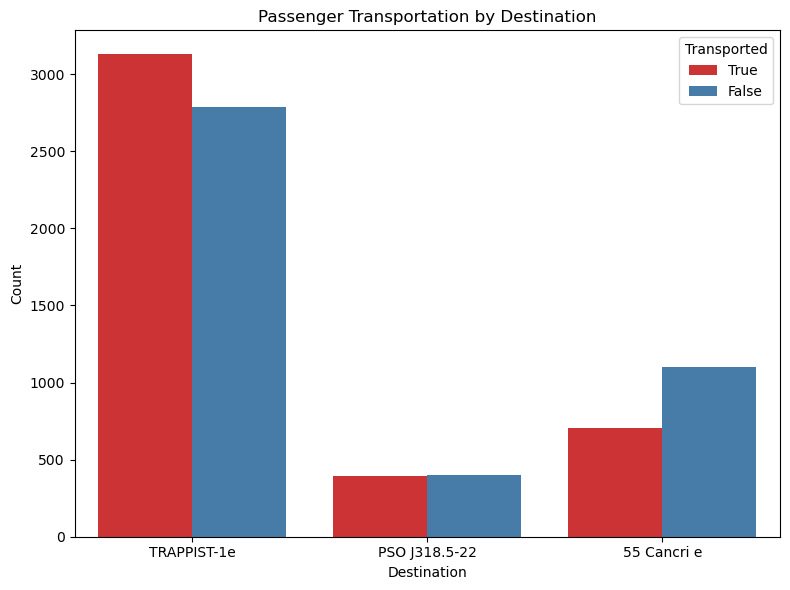

In [1133]:
# Bar Plot (Destination)
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Destination', hue='Transported', palette='Set1')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Passenger Transportation by Destination')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**The graph shows that the most common destination for passengers who were mostly transported is TRAPPIST-1e and PSO J318.5-22.**

### **Dealing with missing values**

In [1134]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,31-45
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,19-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,46-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,31-45
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,31-45
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0-18
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,19-30
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,31-45


In [1135]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Cabin', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'AgeGroup']
train_data = train_data.drop(columns_to_drop, axis=1)
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,False
8689,Earth,True,PSO J318.5-22,18.0,False
8690,Earth,False,TRAPPIST-1e,26.0,True
8691,Europa,False,55 Cancri e,32.0,False


**Dropped columns i would not use and retained 5.**

In [1136]:
# Check missing values in the remaining columns
print_missing_values(train_data)


Columns with missing values:

             Count  Percentage
HomePlanet     201    2.312205
CryoSleep      217    2.496261
Destination    182    2.093639
Age            179    2.059128


In [1137]:
train_data = train_data.dropna()

In [1138]:
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,False
8689,Earth,True,PSO J318.5-22,18.0,False
8690,Earth,False,TRAPPIST-1e,26.0,True
8691,Europa,False,55 Cancri e,32.0,False


In [1139]:
print_missing_values(train_data)

Columns with missing values:

Empty DataFrame
Columns: [Count, Percentage]
Index: []


### **Data Preprocessing**

In [1140]:
train_data['Transported'] = train_data['Transported'].astype(int)
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,0
1,Earth,False,TRAPPIST-1e,24.0,1
2,Europa,False,TRAPPIST-1e,58.0,0
3,Europa,False,TRAPPIST-1e,33.0,0
4,Earth,False,TRAPPIST-1e,16.0,1
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,0
8689,Earth,True,PSO J318.5-22,18.0,0
8690,Earth,False,TRAPPIST-1e,26.0,1
8691,Europa,False,55 Cancri e,32.0,0


In [1141]:
train_data['Transported'].unique()

array([0, 1])

In [1142]:
# Split the dataset
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

In [1143]:
X

,HomePlanet,CryoSleep,Destination,Age
0,Europa,False,TRAPPIST-1e,39.0
1,Earth,False,TRAPPIST-1e,24.0
2,Europa,False,TRAPPIST-1e,58.0
3,Europa,False,TRAPPIST-1e,33.0
4,Earth,False,TRAPPIST-1e,16.0
...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0
8689,Earth,True,PSO J318.5-22,18.0
8690,Earth,False,TRAPPIST-1e,26.0
8691,Europa,False,55 Cancri e,32.0


In [1144]:
X['CryoSleep'] = X['CryoSleep'].astype(int)
X

,HomePlanet,CryoSleep,Destination,Age
0,Europa,0,TRAPPIST-1e,39.0
1,Earth,0,TRAPPIST-1e,24.0
2,Europa,0,TRAPPIST-1e,58.0
3,Europa,0,TRAPPIST-1e,33.0
4,Earth,0,TRAPPIST-1e,16.0
...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0
8689,Earth,1,PSO J318.5-22,18.0
8690,Earth,0,TRAPPIST-1e,26.0
8691,Europa,0,55 Cancri e,32.0


In [1145]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 7930, dtype: int32

In [1146]:
# Create a column transformer

col_trans = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(categories='auto', handle_unknown='ignore'), ['HomePlanet', 'Destination'])
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('col_trans', col_trans)
])

transformed_data = pipe.fit_transform(X)

# Get the one-hot encoded column names from the transformer
encoded_column_names = col_trans.named_transformers_['ohe'].get_feature_names_out(['HomePlanet', 'Destination'])

# Combine the encoded column names with the remaining column name
all_column_names = list(encoded_column_names) + ['CryoSleep','Age']

# Convert the transformed data back to a DataFrame with the correct column names
X = pd.DataFrame(transformed_data, columns=all_column_names)
X

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,39.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,58.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0
...,...,...,...,...,...,...,...,...
7925,0.0,1.0,0.0,1.0,0.0,0.0,0.0,41.0
7926,1.0,0.0,0.0,0.0,1.0,0.0,1.0,18.0
7927,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0
7928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,32.0


### **Train Test Split**


In [1147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1148]:
X_train

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age
1788,1.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0
7334,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0
1108,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0
1232,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
4238,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35.0
...,...,...,...,...,...,...,...,...
4931,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
3264,1.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0
1653,0.0,1.0,0.0,1.0,0.0,0.0,1.0,56.0
2607,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0


### **Modeling**

#### **1. Logistic Regression**

In [1149]:
# Libraries
from sklearn.linear_model import LogisticRegressionCV

logreg_params = {
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100]
}

logreg_model = LogisticRegressionCV(Cs=logreg_params['C'], cv=5)
logreg_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5)

In [1150]:
dir(logreg_model)

['C_',
 'Cs',
 'Cs_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'coefs_paths_',
 'cv',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio_',
 'l1_ratios',
 'l1_ratios_',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_lo

In [1151]:
# After fitting the LogisticRegressionCV model
best_score = logreg_model.scores_[1].max()  # Get the best mean score for class 1 (positive class)
best_params = logreg_model.C_  # Get the best value of C

print("Best Mean Score:", best_score)
print("Best C:", best_params)


Best Mean Score: 0.7289204097714737
Best C: [0.1]


In [1152]:
# Metrics
from sklearn.metrics import accuracy_score, recall_score

# Make predictions on the test dataset
logreg_y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, logreg_y_pred)
recall = recall_score(y_test, logreg_y_pred)

print("Accuracy Score:", accuracy)
print('Recall score:', recall)


Accuracy Score: 0.7181588902900379
Recall score: 0.6234413965087282


In [1153]:
# Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(),
                    param_grid=logreg_params,
                    scoring='recall', 
                    cv=5,
                    return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [1154]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

In [1155]:
def best_score_params(model):
    # Print the best score
    print('best score:', model.best_score_)

    # Print the best hyperparams
    print('best hyperparams:', model.best_params_)

best_score_params(grid)

best score: 0.6245334507042253
best hyperparams: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [1156]:
def accuracy_recall(model):
    y_pred = model.predict(X_test)
    print("Accuracy score: ",accuracy_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))

accuracy_recall(grid)

Accuracy score:  0.71437578814628
Recall score:  0.6259351620947631


In [1157]:
# Without parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accuracy_recall(logreg)

Accuracy score:  0.7181588902900379
Recall score:  0.6234413965087282


**The metrics to be used is recall. <br> This is because the cost of missing a positive case (passengers who were transported) is high.**

#### **2. Decision Tree**

In [1158]:
# Library
from sklearn.tree import DecisionTreeClassifier

decision_tree_params = {
    'criterion': ['gini'],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'random_state': [42],
}

decision_treee_grid = GridSearchCV(DecisionTreeClassifier(),
                                   param_grid=decision_tree_params,
                                   cv=5,
                                   scoring='recall')

decision_treee_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]},
             scoring='recall')

In [1159]:
best_score_params(decision_treee_grid)

best score: 0.6420539906103286
best hyperparams: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [1160]:
accuracy_recall(decision_treee_grid)

Accuracy score:  0.7383354350567465
Recall score:  0.6408977556109726


In [1161]:
# Without parameters
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
accuracy_recall(clf)

Accuracy score:  0.7181588902900379
Recall score:  0.6084788029925187


In [1162]:
best_model = decision_treee_grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

#### **XGBoost**

In [1163]:
# Library
import xgboost as xgb

xgboost_params = {
    'n_estimators': [100],
    'max_depth': [2],
    'learning_rate': [100],
    'gamma': [10],
    'subsample': [0.9],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgboost_grid = GridSearchCV(xgb.XGBClassifier(),
                            param_grid=xgboost_params,
                            cv=5)

xgboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [1164]:
best_score_params(xgboost_grid)

best score: 0.7391238039838617
best hyperparams: {'eval_metric': 'logloss', 'gamma': 10, 'learning_rate': 100, 'max_depth': 2, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.9}


In [1165]:
accuracy_recall(xgboost_grid)

Accuracy score:  0.7364438839848676
Recall score:  0.6346633416458853


In [1166]:
# Without parameters
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)
accuracy_recall(xgbc)

Accuracy score:  0.7301387137452712
Recall score:  0.6172069825436409


#### **Support Vector Machine**

In [ ]:
# Library
from sklearn.svm import SVC

svc_params = {
    'kernel': ['rbf'],
    'C': [1.0],
    'gamma': [1.0]
}

In [1168]:
model1 = grid
model2 = decision_treee_grid
model3 = xgboost_grid

# Create a list of the models
models = [model1, model2, model3]

# Create lists to store accuracy and recall values
accuracy_values = []
recall_values = []

# Calculate accuracy and recall for each model and store the results
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    recall_values.append(recall)

# Create a DataFrame 
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost']
model_results = {
    'Model Name': model_names,
    'Accuracy': accuracy_values,
    'Recall': recall_values
}
results_df = pd.DataFrame(model_results)
results_df

,Model Name,Accuracy,Recall
0,Logistic Regression,0.714376,0.625935
1,Decision Tree,0.738335,0.640898
2,XGBoost,0.736444,0.634663


In [1170]:
# Find the best model based on recall
best_model = results_df.loc[results_df['Recall'].idxmax()]

print("Best Model (based on Recall):")
best_model

Best Model (based on Recall):


Model Name    Decision Tree
Accuracy           0.738335
Recall             0.640898
Name: 1, dtype: object